<div align="center">

# Stock Market Prediction Using Machine Learning

</div>

- [LSTM](#LSTM)

- [BPNN](#BPNN)

- [Random Forest](#RandomForest)
- [GRU](#GRU)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib

In [4]:
file_path = r'D:\Financial_analysis\Data\CSV\hydro.csv'
stock_data = pd.read_csv(file_path)

In [5]:
stock_data

,Open,High,Low,Close,Change,Per Change (%),Turnover,Date
0,546.88,546.88,546.88,546.88,0.00,0.00,0,1/3/2010
1,543.2,543.2,543.2,543.2,0.00,0.00,0,1/4/2010
2,536.18,536.18,536.18,536.18,0.00,0.00,0,1/5/2010
3,536.63,536.63,536.63,536.63,0.00,0.00,0,1/6/2010
4,535.81,535.81,535.81,535.81,0.00,0.00,0,1/7/2010
...,...,...,...,...,...,...,...,...
3280,"2,370.19","2,374.47","2,345.61","2,357.11",-10.65,-0.44,"485,479,410.70",5/6/2024
3281,"2,357.32","2,373.33","2,339.38","2,346.63",-10.48,-0.44,"375,741,944.30",5/7/2024
3282,"2,345.48","2,363.20","2,333.87","2,347.13",0.50,0.02,"376,059,652.85",5/8/2024
3283,"2,352.60","2,360.99","2,335.87","2,352.07",4.93,0.21,"504,510,710.40",5/9/2024


In [6]:
# Convert the 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%m/%d/%Y')

# Sort the data by date
stock_data = stock_data.sort_values('Date')
stock_data['Date']

0      2010-01-03
1      2010-01-04
2      2010-01-05
3      2010-01-06
4      2010-01-07
          ...    
3280   2024-05-06
3281   2024-05-07
3282   2024-05-08
3283   2024-05-09
3284   2024-05-12
Name: Date, Length: 3285, dtype: datetime64[ns]

In [7]:
stock_data

,Open,High,Low,Close,Change,Per Change (%),Turnover,Date
0,546.88,546.88,546.88,546.88,0.00,0.00,0,2010-01-03
1,543.2,543.2,543.2,543.2,0.00,0.00,0,2010-01-04
2,536.18,536.18,536.18,536.18,0.00,0.00,0,2010-01-05
3,536.63,536.63,536.63,536.63,0.00,0.00,0,2010-01-06
4,535.81,535.81,535.81,535.81,0.00,0.00,0,2010-01-07
...,...,...,...,...,...,...,...,...
3280,"2,370.19","2,374.47","2,345.61","2,357.11",-10.65,-0.44,"485,479,410.70",2024-05-06
3281,"2,357.32","2,373.33","2,339.38","2,346.63",-10.48,-0.44,"375,741,944.30",2024-05-07
3282,"2,345.48","2,363.20","2,333.87","2,347.13",0.50,0.02,"376,059,652.85",2024-05-08
3283,"2,352.60","2,360.99","2,335.87","2,352.07",4.93,0.21,"504,510,710.40",2024-05-09


In [8]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%m/%d/%Y')

# Sort the data by date
stock_data = stock_data.sort_values('Date')

# Remove commas from numeric columns and convert to float
numeric_columns = ['Close', 'High', 'Low']
stock_data[numeric_columns] = stock_data[numeric_columns].replace(',', '', regex=True).astype(float)

# Calculate Simple Moving Average (SMA)
stock_data['SMA'] = talib.SMA(stock_data['Close'], timeperiod=14)

# Calculate Weighted Moving Average (WMA)
stock_data['WMA'] = talib.WMA(stock_data['Close'], timeperiod=14)

# Calculate Momentum
stock_data['Momentum'] = talib.MOM(stock_data['Close'], timeperiod=14)

# Calculate Stochastic %K and %D
slowk, slowd = talib.STOCH(stock_data['High'], stock_data['Low'], stock_data['Close'])
stock_data['Stochastic_%K'] = slowk
stock_data['Stochastic_%D'] = slowd

# Calculate Relative Strength Index (RSI)
stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)

# Calculate Moving Average Convergence Divergence (MACD)
macd, signal, _ = talib.MACD(stock_data['Close'])
stock_data['MACD'] = macd
stock_data['MACD_Signal'] = signal

# Calculate Larry Williams R%
stock_data['Larry_Williams_R%'] = talib.WILLR(stock_data['High'], stock_data['Low'], stock_data['Close'])

# Calculate Accumulation/Distribution Oscillator (A/D Oscillator)
# stock_data['A/D_Oscillator'] = talib.ADOSC(stock_data['High'], stock_data['Low'], stock_data['Close'], stock_data['Volume'].str.replace(',', '').astype(float))

# Calculate Commodity Channel Index (CCI)
stock_data['CCI'] = talib.CCI(stock_data['High'], stock_data['Low'], stock_data['Close'])

 ### Feature Extraction

In [12]:
stock_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Change', 'Per Change (%)', 'Turnover',
       'Date', 'SMA', 'WMA', 'Momentum', 'Stochastic_%K', 'Stochastic_%D',
       'RSI', 'MACD', 'MACD_Signal', 'Larry_Williams_R%', 'CCI'],
      dtype='object')

In [13]:
new_data = stock_data[['Close','Date','Open', 'High', 'Low','SMA','WMA', 'Momentum', 'Stochastic_%K', 'Stochastic_%D',
       'RSI', 'MACD', 'MACD_Signal', 'Larry_Williams_R%',
       'CCI']]
new_data

,Close,Date,Open,High,Low,SMA,WMA,Momentum,Stochastic_%K,Stochastic_%D,RSI,MACD,MACD_Signal,Larry_Williams_R%,CCI
0,546.88,2010-01-03,546.88,546.88,546.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,543.20,2010-01-04,543.2,543.20,543.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,536.18,2010-01-05,536.18,536.18,536.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,536.63,2010-01-06,536.63,536.63,536.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,535.81,2010-01-07,535.81,535.81,535.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,2357.11,2024-05-06,"2,370.19",2374.47,2345.61,2415.495000,2400.525238,-124.71,19.576073,36.905405,34.977977,-33.170611,-29.797135,-92.851815,-160.404424
3281,2346.63,2024-05-07,"2,357.32",2373.33,2339.38,2405.145000,2391.343238,-144.90,9.228954,24.156986,33.721726,-35.491907,-30.936089,-95.298924,-157.684324
3282,2347.13,2024-05-08,"2,345.48",2363.20,2333.87,2396.555714,2383.607905,-120.25,9.756730,12.853919,33.843806,-36.866233,-32.122118,-89.972018,-149.322966
3283,2352.07,2024-05-09,"2,352.60",2360.99,2335.87,2390.635000,2377.676476,-82.89,14.267349,11.084344,35.115427,-37.128782,-33.123451,-84.183540,-115.560381


In [14]:
new_data.isna().sum()

Close                 0
Date                  0
Open                  0
High                  0
Low                   0
SMA                  13
WMA                  13
Momentum             14
Stochastic_%K         8
Stochastic_%D         8
RSI                  14
MACD                 33
MACD_Signal          33
Larry_Williams_R%    13
CCI                  13
dtype: int64

In [15]:
new_data.dropna(inplace = True)

C:\Users\M9\AppData\Local\Temp\ipykernel_13848\349852699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.dropna(inplace = True)


In [16]:
new_data.isna().sum()

Close                0
Date                 0
Open                 0
High                 0
Low                  0
SMA                  0
WMA                  0
Momentum             0
Stochastic_%K        0
Stochastic_%D        0
RSI                  0
MACD                 0
MACD_Signal          0
Larry_Williams_R%    0
CCI                  0
dtype: int64

In [17]:
new_data,new_data.shape

(        Close       Date      Open     High      Low          SMA  \
 33     485.14 2010-02-18    485.14   485.14   485.14   495.575714   
 34     497.96 2010-03-01    497.96   497.96   497.96   494.548571   
 35     502.81 2010-03-02    502.81   502.81   502.81   494.027857   
 36     517.00 2010-03-03       517   517.00   517.00   494.740714   
 37     508.26 2010-03-04    508.26   508.26   508.26   495.076429   
 ...       ...        ...       ...      ...      ...          ...   
 3280  2357.11 2024-05-06  2,370.19  2374.47  2345.61  2415.495000   
 3281  2346.63 2024-05-07  2,357.32  2373.33  2339.38  2405.145000   
 3282  2347.13 2024-05-08  2,345.48  2363.20  2333.87  2396.555714   
 3283  2352.07 2024-05-09  2,352.60  2360.99  2335.87  2390.635000   
 3284  2355.92 2024-05-12  2,352.60  2359.35  2336.98  2387.007857   
 
               WMA  Momentum  Stochastic_%K  Stochastic_%D        RSI  \
 33     491.191619    -30.10      15.585079      43.672288  27.452814   
 34     491.

In [18]:
# Calculate summary statistics
summary_of_data =  new_data.describe()
summary_of_data



,Close,Date,High,Low,SMA,WMA,Momentum,Stochastic_%K,Stochastic_%D,RSI,MACD,MACD_Signal,Larry_Williams_R%,CCI
count,3252.000000,3252,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3.252000e+03,3.252000e+03,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000
mean,1342.312085,2017-04-07 00:19:55.571955968,1355.505796,1329.358435,1338.556841,1339.815669,8.133441,4.791269e+01,4.792108e+01,51.288353,4.146598,4.172035,-51.327533,-0.837809
min,292.000000,2010-02-18 00:00:00,292.000000,292.000000,301.500000,301.161905,-860.930000,-4.736952e-15,-4.894850e-14,9.189924,-183.938933,-168.701092,-100.000000,-331.303419
25%,547.000000,2013-09-03 18:00:00,547.000000,547.000000,544.678571,544.147619,-40.117500,1.874952e+01,2.090419e+01,39.537279,-12.203341,-11.765620,-85.955641,-95.167950
50%,1189.730000,2017-04-10 12:00:00,1195.465000,1183.525000,1183.481429,1185.811238,0.080000,4.556461e+01,4.568023e+01,49.920266,0.073525,-0.158343,-53.093160,-6.383149
75%,1823.735000,2020-12-06 06:00:00,1836.945000,1813.855000,1797.894464,1799.614190,44.000000,7.732271e+01,7.436950e+01,63.009382,16.984845,17.415298,-17.765561,88.583733
max,3864.440000,2024-05-12 00:00:00,3955.920000,3848.700000,3691.342857,3723.725333,839.890000,1.000000e+02,1.000000e+02,92.837588,225.198863,201.587960,1.996616,445.702918
std,813.720450,NaN,829.088445,799.140851,811.444663,811.940369,140.986660,3.208753e+01,3.000588e+01,16.496577,42.899005,40.362504,35.163776,112.725528


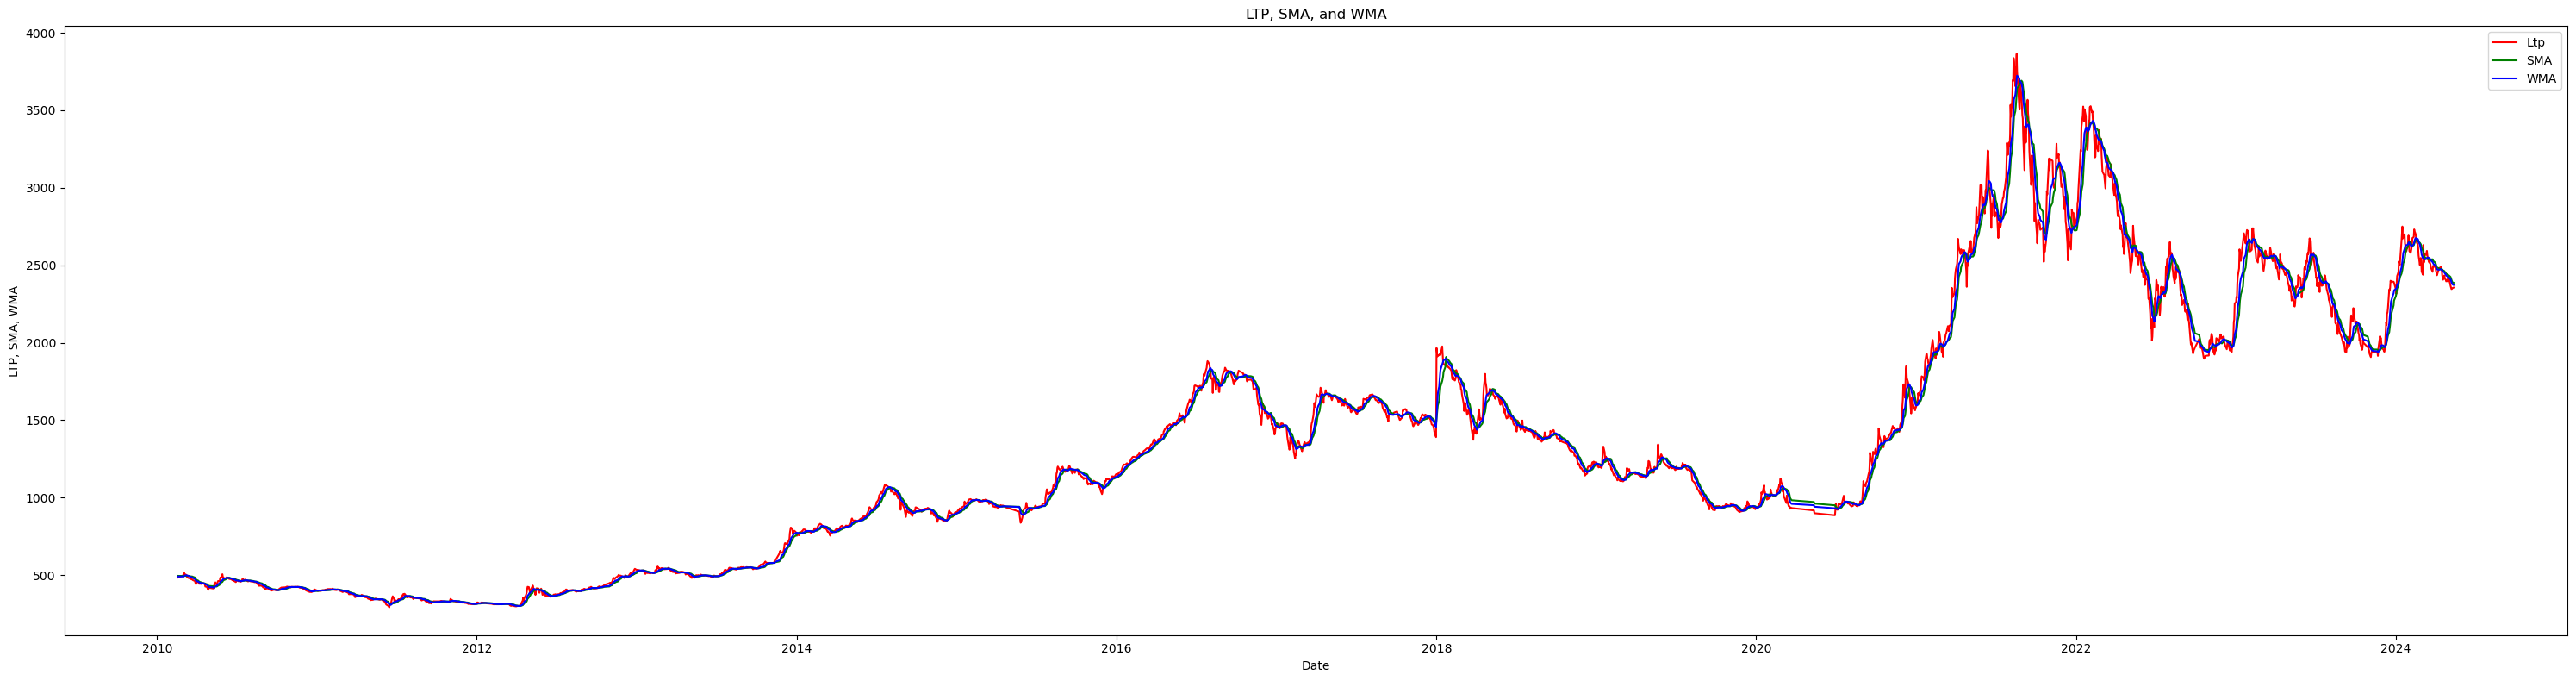

In [19]:
plt.figure(figsize=(30, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

plt.plot(new_data['Date'], new_data['Close'], label='Ltp', color='red')  # Replace 'Adj Close' with 'Ltp'
plt.plot(new_data['Date'], new_data['SMA'], label='SMA', color='green')  # Replace 'Adj Close' with 'Ltp'
plt.plot(new_data['Date'], new_data['WMA'], label='WMA', color='blue')  # Replace 'Adj Close' with 'Ltp'

plt.xlabel('Date')
plt.ylabel('LTP, SMA, WMA')
plt.title("LTP, SMA, and WMA")
plt.legend()
plt.tight_layout()
# # Save the figure to a file
# plt.savefig("output_plot.png")
#Display the figure
plt.show()

### Feature and target (X,y)

In [22]:
# drop the Date column from the new_data DataFrame
feature_data = new_data.drop('Date', axis=1)
# Remove commas from numeric columns and convert to float
feature_data = feature_data.replace(',', '', regex=True).astype(float)
# print the resulting DataFrame
feature_data,feature_data.shape


(        Close     Open     High      Low          SMA          WMA  Momentum  \
 33     485.14   485.14   485.14   485.14   495.575714   491.191619    -30.10   
 34     497.96   497.96   497.96   497.96   494.548571   491.509524    -14.38   
 35     502.81   502.81   502.81   502.81   494.027857   492.611048     -7.29   
 36     517.00   517.00   517.00   517.00   494.740714   495.674000      9.98   
 37     508.26   508.26   508.26   508.26   495.076429   497.476571      4.70   
 ...       ...      ...      ...      ...          ...          ...       ...   
 3280  2357.11  2370.19  2374.47  2345.61  2415.495000  2400.525238   -124.71   
 3281  2346.63  2357.32  2373.33  2339.38  2405.145000  2391.343238   -144.90   
 3282  2347.13  2345.48  2363.20  2333.87  2396.555714  2383.607905   -120.25   
 3283  2352.07  2352.60  2360.99  2335.87  2390.635000  2377.676476    -82.89   
 3284  2355.92  2352.60  2359.35  2336.98  2387.007857  2373.047810    -50.78   
 
       Stochastic_%K  Stoc

In [21]:
# Run only to save the summary data to the location
technical_indicator = feature_data[['SMA', 'WMA', 'Momentum',
       'Stochastic_%K', 'Stochastic_%D', 'RSI', 'MACD', 'MACD_Signal',
       'Larry_Williams_R%', 'CCI']]

# Compute summary statistics
summary_stats = technical_indicator.describe()

# Transpose the summary statistics
summary_stats_transposed = summary_stats.transpose()

# Save the transposed summary statistics to the given location
output_file = 'D:/Financial_analysis/Data/dataDistribution/hydro_technical_indicator_data_summary.csv'
summary_stats_transposed.to_csv(output_file)

In [23]:
# convert dataframe to array
dataset = feature_data.values
dataset,dataset.shape

(array([[ 485.14      ,  485.14      ,  485.14      , ...,  -13.05648902,
          -78.45399481,  -82.9925017 ],
        [ 497.96      ,  497.96      ,  497.96      , ...,  -12.73824359,
          -37.43447425,   30.91862498],
        [ 502.81      ,  502.81      ,  502.81      , ...,  -12.18237378,
          -14.34412266,   85.65855018],
        ...,
        [2347.13      , 2345.48      , 2363.2       , ...,  -32.12211808,
          -89.97201845, -149.32296557],
        [2352.07      , 2352.6       , 2360.99      , ...,  -33.12345091,
          -84.18354045, -115.56038055],
        [2355.92      , 2352.6       , 2359.35      , ...,  -33.81960887,
          -80.83775093,  -92.50059499]]),
 (3252, 14))

### Preprocessing 

In [24]:
from sklearn.preprocessing import MinMaxScaler

#create minMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

#Reshape the array to have four feature
dataset_reshaped = dataset.reshape(-1,14)

#scale the date
scaled_data = scaler.fit_transform(dataset_reshaped)
scaled_data,scaled_data.shape

(array([[0.05406389, 0.05357812, 0.05271403, ..., 0.42033272, 0.21124235,
         0.31957386],
        [0.05765247, 0.05713446, 0.05621302, ..., 0.42119217, 0.61340786,
         0.46617643],
        [0.05901009, 0.05847987, 0.05753674, ..., 0.42269335, 0.83979137,
         0.53662621],
        ...,
        [0.57527348, 0.56964683, 0.56529619, ..., 0.36884421, 0.09831681,
         0.23420717],
        [0.57665629, 0.57162196, 0.56469301, ..., 0.36614002, 0.15506847,
         0.2776593 ],
        [0.57773399, 0.57162196, 0.5642454 , ..., 0.36425998, 0.18787142,
         0.30733704]]),
 (3252, 14))

In [25]:
#checking to reverse to orignal data
original_data = scaler.inverse_transform(scaled_data)
print("Original Data Shape:",original_data.shape)
print(original_data)


Original Data Shape: (3252, 14)
[[ 485.14        485.14        485.14       ...  -13.05648902
   -78.45399481  -82.9925017 ]
 [ 497.96        497.96        497.96       ...  -12.73824359
   -37.43447425   30.91862498]
 [ 502.81        502.81        502.81       ...  -12.18237378
   -14.34412266   85.65855018]
 ...
 [2347.13       2345.48       2363.2        ...  -32.12211808
   -89.97201845 -149.32296557]
 [2352.07       2352.6        2360.99       ...  -33.12345091
   -84.18354045 -115.56038055]
 [2355.92       2352.6        2359.35       ...  -33.81960887
   -80.83775093  -92.50059499]]


### Train test Split

In [26]:
# 80/20 train/test split
import numpy as np
training_data_len = int(np.ceil(len(scaled_data)*0.8))
train_data = scaled_data[0:int(training_data_len), :]
x_train, y_train = [], []

In [27]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, :])
     # Assuming you want to predict the 'Ltp' feature
    y_train.append(train_data[i, 0]) 

In [30]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [33]:
x_train.shape,y_train.shape

((2542, 60, 14), (2542,))

In [34]:
# x_train,y_train = np.array(x_train),np.array(y_train)
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape,y_train.shape

((2542, 60, 14), (2542,))

In [35]:
# Check if x_train is not empty before reshaping
if x_train.shape[0] > 0:
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 14))
    print("Reshape successful!")
else:
    print("x_train is empty. Check the loop for appending values.")

Reshape successful!


# LSTM

In [36]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 14)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [37]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
# Train the model
lstm_model_nica_10 = model.fit(x_train, y_train, batch_size=10, epochs=2)

Epoch 1/2
255/255 [==============================] - 37s 86ms/step - loss: 0.0014
Epoch 2/2
255/255 [==============================] - 20s 80ms/step - loss: 2.3478e-04


 ### update this 
```python
switch_folder = 'nica/lstm/10'


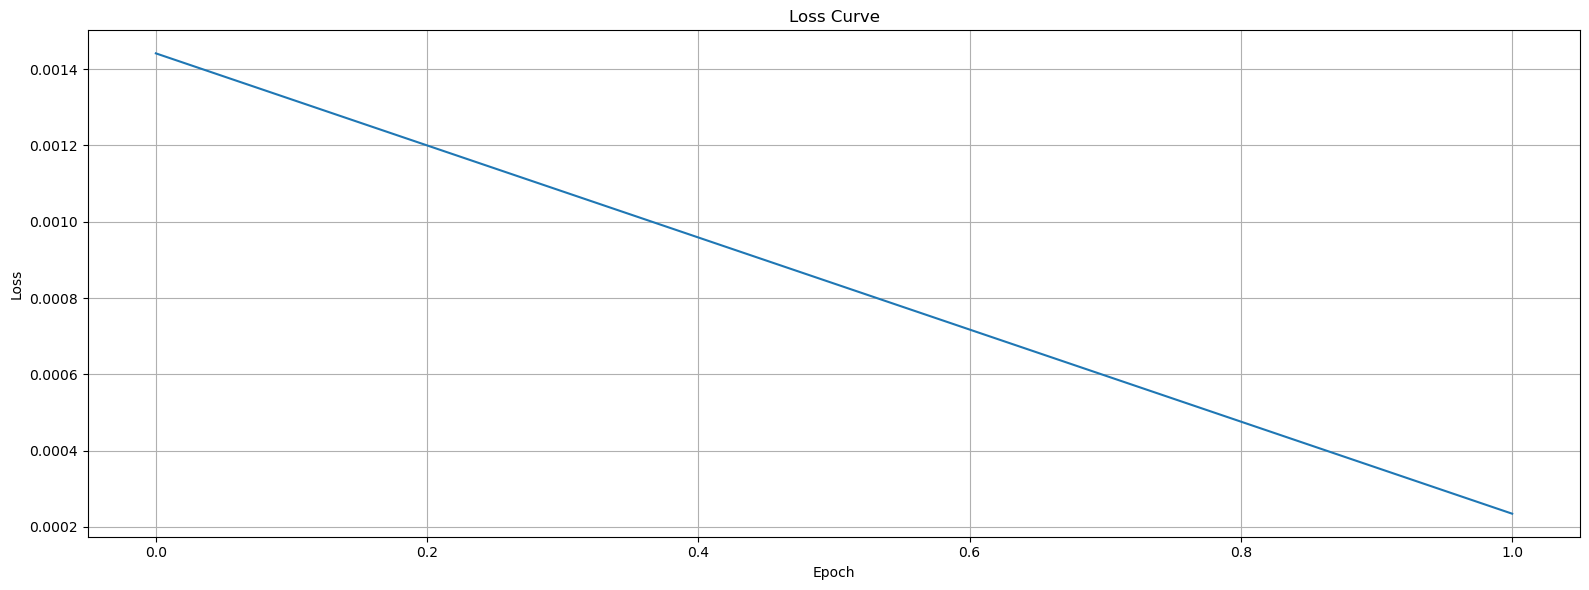

In [39]:
import os
import matplotlib.pyplot as plt


# Plot the loss curve
plt.figure(figsize=(16,6))
plt.plot(lstm_model_nica_10.history['loss'])
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.tight_layout()

# switch_folder = 'nica/lstm/10'
# # Specify the directory to save the plot
# save_folder = f'D:/Financial_analysis/01_stock_results/techincalFeature/{switch_folder}'


# Create the directory if it doesn't exist
# os.makedirs(save_folder, exist_ok=True)

# Save the plot to the specified folder
# plt.savefig(os.path.join(save_folder, 'loss_curve.png'))

plt.show()


model_name = 'lstm_model_nica_10.pkl'
    
    

In [40]:
# import pickle
# import os

# # Define the folder and model name
#   # Using forward slashes
# model_name = 'lstm_model_nica_10.pkl'

# # Define the full file path where you want to save the model using f-string
# file_path = f'D:/Financial_analysis/01_stock_results/techincalFeature/{switch_folder}/{model_name}'

# # Ensure the directory exists, create if it doesn't
# os.makedirs(os.path.dirname(file_path), exist_ok=True)

# # Save the trained model to disk
# with open(file_path, 'wb') as f:
#     pickle.dump('lstm_model_nica_10.pkl', f)


In [41]:
# Prepare the testing data
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, 0]  # Assuming you want to predict the 'Ltp' feature

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, :])

In [42]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [43]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 14))

In [44]:
# Assuming the model has been trained and you have the x_test data
# Generate predictions on the test data
predictions = model.predict(x_test)

# predictions = scaler.inverse_transform(predictions)  # Inverse transform to get original scale

# # Reshape predictions to match the original data shape
predictions = predictions.reshape(-1, 1)

# # Repeat the column to match the original data shape
predictions = np.repeat(predictions, 14, axis=1)

# # Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)

21/21 [==============================] - 3s 33ms/step


In [45]:
predictions


array([[3180.4336  , 3206.6218  , 3254.3982  , ...,  130.6896  ,
         -17.53243 ,  296.9314  ],
       [3212.3025  , 3238.7798  , 3287.0833  , ...,  133.99287 ,
         -16.62254 ,  303.8629  ],
       [3261.288   , 3288.2095  , 3337.323   , ...,  139.0703  ,
         -15.223957,  314.51724 ],
       ...,
       [2393.9084  , 2412.9656  , 2447.7324  , ...,   49.16505 ,
         -39.98848 ,  125.86206 ],
       [2376.036   , 2394.931   , 2429.402   , ...,   47.312523,
         -40.49876 ,  121.97476 ],
       [2367.5676  , 2386.3857  , 2420.7168  , ...,   46.43476 ,
         -40.74054 ,  120.13289 ]], dtype=float32)

In [46]:
#Ltp prdictions
predicted_ltp_values = predictions[:, 0]
predicted_ltp_values

array([3180.4336, 3212.3025, 3261.288 , 3304.8674, 3351.0923, 3402.0981,
       3452.3508, 3506.8489, 3555.381 , 3569.9712, 3572.965 , 3585.1738,
       3610.3733, 3626.704 , 3601.1746, 3550.0466, 3517.9988, 3495.5652,
       3463.4382, 3424.739 , 3377.2805, 3318.0305, 3289.4973, 3281.3098,
       3278.5188, 3281.6565, 3310.5781, 3343.405 , 3365.2026, 3365.963 ,
       3340.1323, 3283.731 , 3229.9167, 3205.4473, 3194.6226, 3176.0574,
       3140.6592, 3086.5476, 3040.957 , 2998.8313, 2950.3694, 2895.9102,
       2849.0662, 2824.6692, 2814.6948, 2806.965 , 2798.1074, 2770.685 ,
       2729.8196, 2700.2139, 2680.6616, 2678.9656, 2710.005 , 2764.2158,
       2817.7566, 2868.3945, 2922.0845, 2966.5215, 3005.5125, 3043.3257,
       3078.3237, 3095.2463, 3091.91  , 3077.6475, 3071.2163, 3094.5945,
       3136.7937, 3170.809 , 3191.306 , 3201.308 , 3189.7366, 3174.6873,
       3156.1318, 3119.1987, 3078.2546, 3042.8232, 3018.8865, 2993.6099,
       2963.273 , 2948.93  , 2936.0557, 2911.4387, 

C:\Users\M9\AppData\Local\Temp\ipykernel_13848\1266752010.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.loc[:, 'Predictions'] = predicted_ltp_values


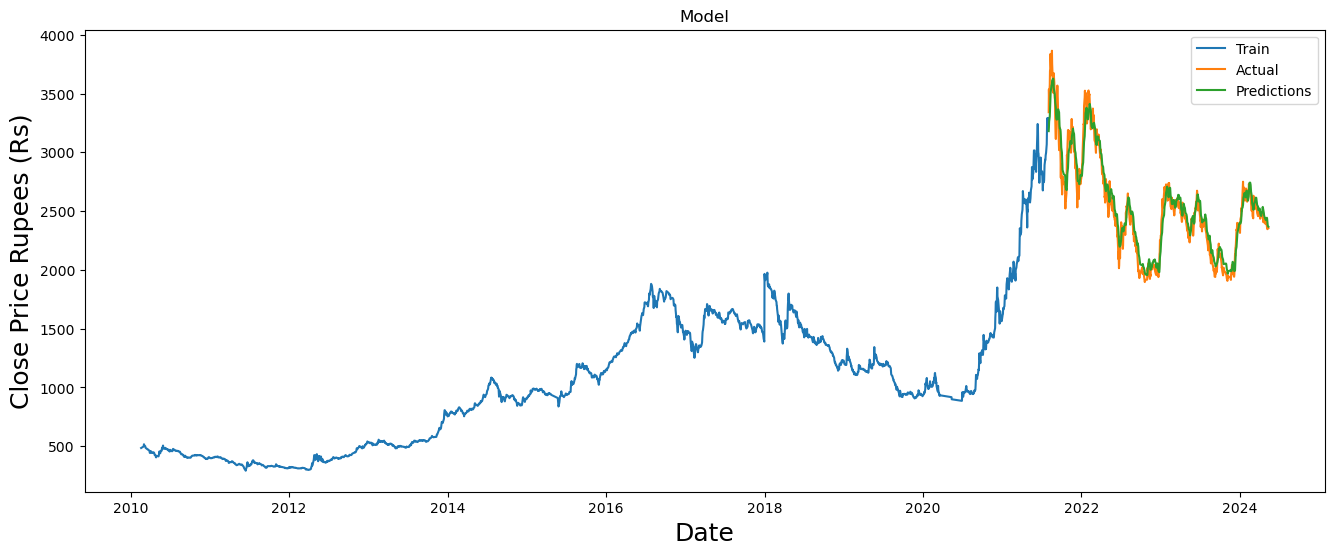

In [47]:
import matplotlib.pyplot as plt

# Plotting
train = new_data[:training_data_len]
valid = new_data[training_data_len:]
predicted_ltp_values = predicted_ltp_values[:len(valid)]

# Add the 'Predictions' column to the 'valid' DataFrame
valid.loc[:, 'Predictions'] = predicted_ltp_values

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupees (Rs)', fontsize=18)
plt.plot(train['Date'],train['Close'])  
plt.plot(valid['Date'],valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='upper right')
        # save the plot
        # Save the plot to the specified folder
# plot_no = 1
# file_name = f'plot_{plot_no}.png'
# plt.savefig(os.path.join(save_folder, file_name))
plt.show()
       
# # Create the directory if it doesn't exist
# os.makedirs(save_folder, exist_ok=True)

     

C:\Users\M9\AppData\Local\Temp\ipykernel_13848\4177272527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Date'] = pd.to_datetime(valid['Date'])


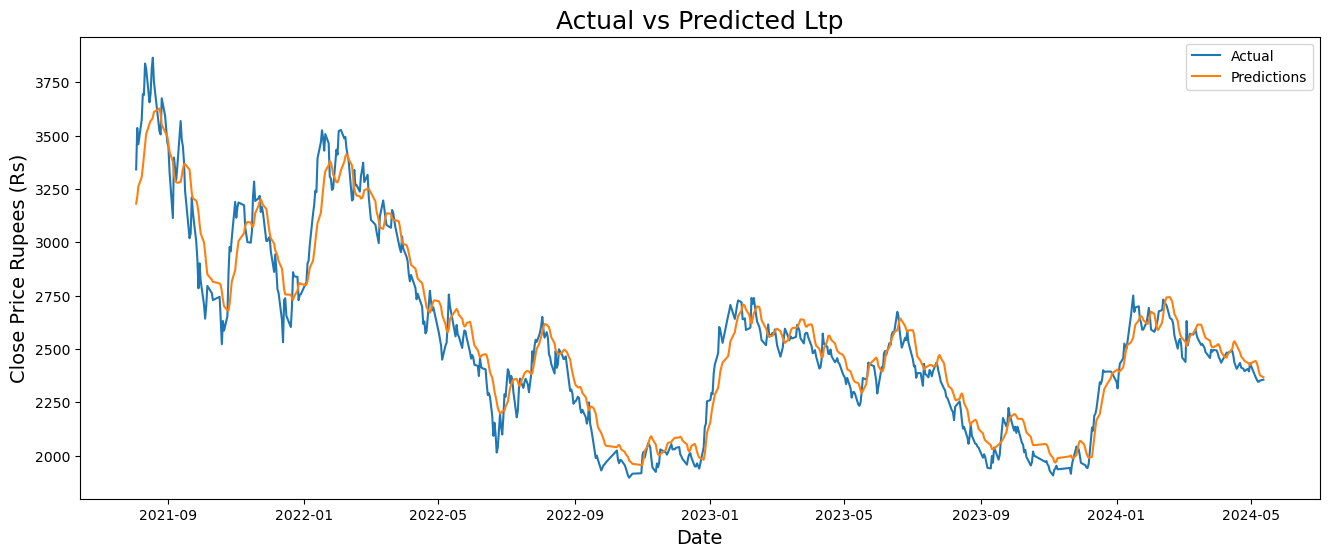

In [48]:
# Convert 'Date' column to datetime format (if not already)
valid['Date'] = pd.to_datetime(valid['Date'])

# Plotting
plt.figure(figsize=(16, 6))
plt.title('Actual vs Predicted Ltp', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price Rupees (Rs)', fontsize=14)

# Plot actual Ltp values
plt.plot(valid['Date'], valid['Close'], label='Actual')
         # , marker='o', linestyle='-')

# Plot predicted Ltp values
plt.plot(valid['Date'], valid['Predictions'], label='Predictions')
         # , marker='x', linestyle='--')
# plot_no = 2
# file_name = f'plot_{plot_no}.png'
# plt.savefig(os.path.join(save_folder, file_name))

plt.legend()
plt.show()

C:\Users\M9\AppData\Local\Temp\ipykernel_13848\1784425886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Relative_Error'] = (valid['Close'] - valid['Predictions']) / valid['Close']


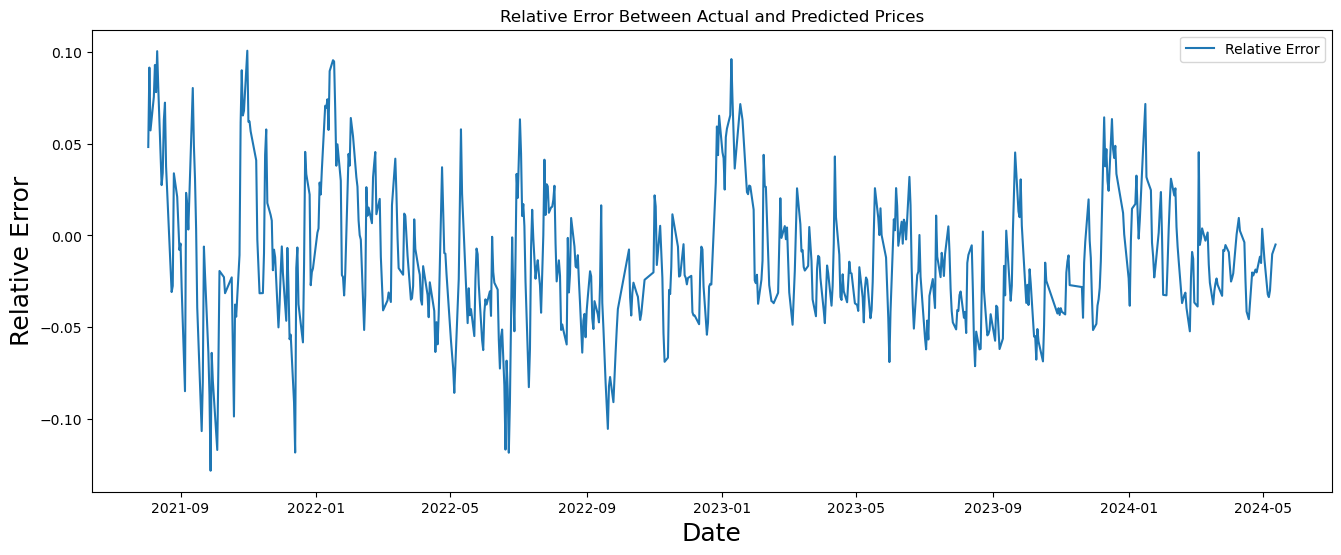

In [49]:
# Calculate relative error
valid['Relative_Error'] = (valid['Close'] - valid['Predictions']) / valid['Close']

# Sort DataFrame by date
valid = valid.sort_values(by='Date')

# Plotting
plt.figure(figsize=(16, 6))
plt.plot(valid['Date'], valid['Relative_Error'], label='Relative Error')
plt.title('Relative Error Between Actual and Predicted Prices')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Relative Error', fontsize=18)
plt.legend()
plot_no = 3
# file_name = f'plot_{plot_no}.png'
# plt.savefig(os.path.join(save_folder, file_name))
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# # Assuming you have the predictions for the test data
# predicted_ltp_values = model.predict(x_test)
# predicted_ltp_values = scaler.inverse_transform(predicted_ltp_values)  # Inverse transform to get original scale

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicted_ltp_values))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test, predicted_ltp_values)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MAPE
mape = np.mean(np.abs((y_test - predicted_ltp_values) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Root Mean Squared Error (RMSE): 106.01201428100961
Mean Absolute Error (MAE): 83.81339034705529
Mean Absolute Percentage Error (MAPE): 3.2796408446201326%


In [51]:
# # Save the output to a file
# file_path = os.path.join(save_folder, 'evaluation_results.txt')
# with open(file_path, 'w') as f:
#     f.write(f'Root Mean Squared Error (RMSE): {rmse}\n')
#     f.write(f'Mean Absolute Error (MAE): {mae}\n')
#     f.write(f'Mean Absolute Percentage Error (MAPE): {mape}%\n')

# RandomForest

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [64]:
# Reshape the training and testing data for Random Forest
x_train_rf = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_test_rf = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] * x_test.shape[2]))

In [65]:
# Create and train the Random Forest model
rf_model_nica_10 = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model_nica_10.fit(x_train_rf, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [66]:
rf_predictions = rf_model_nica_10.predict(x_test_rf)

rf_predictions = rf_predictions.reshape(-1, 1)

rf_predictions = np.repeat(rf_predictions, 14, axis=1)

rf_predictions = scaler.inverse_transform(rf_predictions)

In [67]:
rf_predictions

array([[2458.819     , 2466.21553837, 2479.89131325, ...,   51.7443484 ,
         -23.59665615,  151.66702595],
       [2457.289     , 2464.68029872, 2478.34638578, ...,   51.64344997,
         -23.65160281,  151.32489321],
       [2448.106     , 2455.46585052, 2469.07379167, ...,   51.03786154,
         -23.98139053,  149.27142596],
       ...,
       [2311.719     , 2318.6117782 , 2331.35612944, ...,   42.04359072,
         -28.87943663,  118.77308788],
       [2309.81      , 2316.69624062, 2329.42850424, ...,   41.91769849,
         -28.94799426,  118.34620462],
       [2312.186     , 2319.08037749, 2331.82768573, ...,   42.07438782,
         -28.86266533,  118.87751663]])

In [68]:
rf_predicted_ltp_values = rf_predictions[:, 0]
rf_predicted_ltp_values

array([2458.819, 2457.289, 2448.106, 2443.611, 2443.611, 2438.791,
       2428.441, 2422.618, 2496.428, 2501.524, 2497.795, 2502.179,
       2516.012, 2519.956, 2522.554, 2620.581, 2707.934, 2616.208,
       2702.022, 2748.18 , 2789.216, 2816.599, 2776.856, 2796.372,
       2814.482, 2906.008, 2848.413, 2861.146, 2845.284, 2846.547,
       2871.547, 2833.057, 2770.519, 2781.055, 2844.09 , 2878.829,
       2852.286, 2865.985, 2870.305, 2854.884, 2867.748, 2786.239,
       2775.362, 2725.398, 2730.835, 2715.182, 2751.459, 2732.03 ,
       2730.652, 2767.152, 2738.296, 2756.684, 2631.486, 2628.035,
       2637.434, 2554.496, 2532.14 , 2537.71 , 2559.738, 2543.217,
       2629.977, 2630.438, 2653.298, 2655.872, 2658.066, 2660.268,
       2655.957, 2656.491, 2640.407, 2584.657, 2555.622, 2551.778,
       2543.319, 2535.126, 2541.416, 2536.609, 2435.166, 2433.975,
       2439.798, 2443.212, 2437.389, 2437.134, 2432.07 , 2432.07 ,
       2441.222, 2441.477, 2429.054, 2429.054, 2441.59 , 2435.

C:\Users\M9\AppData\Local\Temp\ipykernel_9772\2251196944.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = rf_predicted_ltp_values


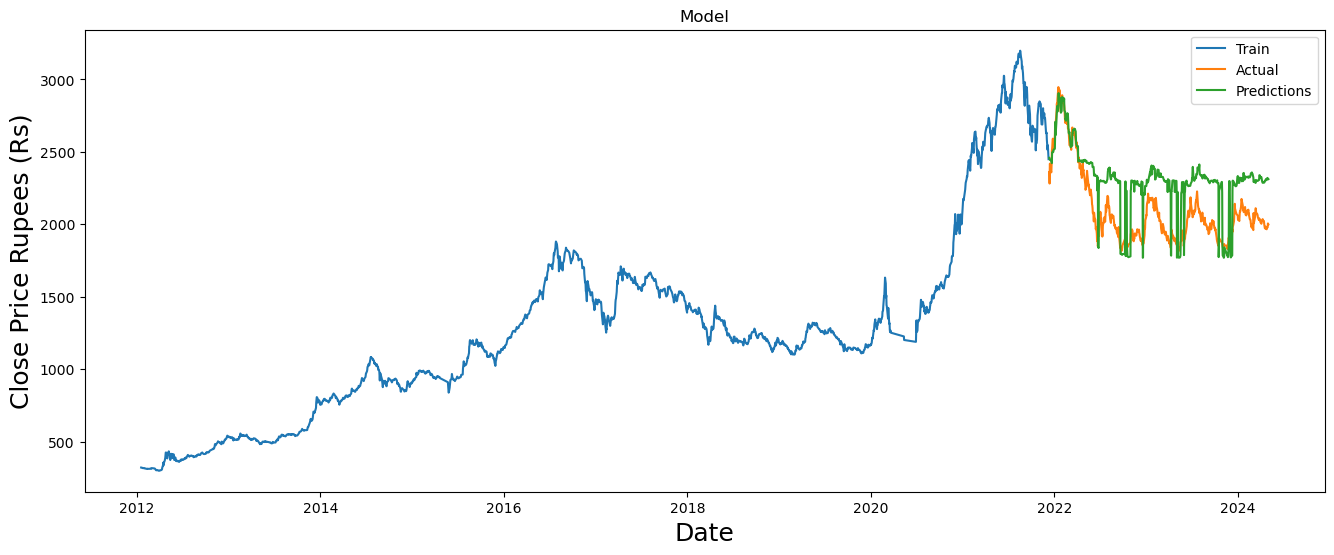

In [69]:
import matplotlib.pyplot as plt

# Plotting
train = new_data[:training_data_len]
valid = new_data[training_data_len:]
rf_predicted_ltp_values = rf_predicted_ltp_values[:len(valid)]

# Add the 'Predictions' column to the 'valid' DataFrame
valid['Predictions'] = rf_predicted_ltp_values

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupees (Rs)', fontsize=18)
plt.plot(train['Date'],train['Close'])  # Use 'Ltp' instead of 'Close'
plt.plot(valid['Date'],valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='upper right')


switch_folder = 'nica/random_forest/100'
# Specify the directory to save the plot
save_folder = f'D:/Financial_analysis/01_stock_results/techincalFeature/{switch_folder}'

# Create the directory if it doesn't exist
os.makedirs(save_folder, exist_ok=True)
    
plot_no = 1
file_name = f'plot_{plot_no}.png'
plt.savefig(os.path.join(save_folder, file_name))
plt.show()




In [70]:
# valid

C:\Users\M9\AppData\Local\Temp\ipykernel_9772\2477543810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Date'] = pd.to_datetime(valid['Date'])


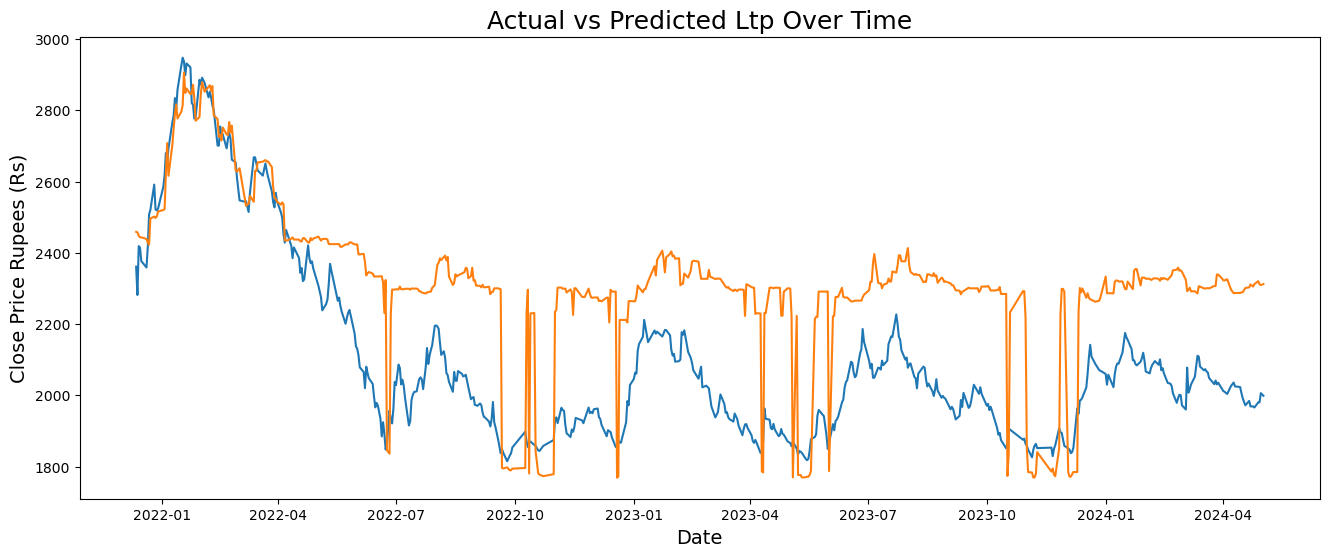

In [71]:
# Convert 'Date' column to datetime format (if not already)
valid['Date'] = pd.to_datetime(valid['Date'])

# Plotting
plt.figure(figsize=(16, 6))
plt.title('Actual vs Predicted Ltp Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price Rupees (Rs)', fontsize=14)

# Plot actual Ltp values
plt.plot(valid['Date'], valid['Close'], label='Actual')
         # , marker='o', linestyle='-')

# Plot predicted Ltp values
plt.plot(valid['Date'], valid['Predictions'], label='Predictions')
         # , marker='x', linestyle='--')

plot_no = 2
file_name = f'plot_{plot_no}.png'
plt.savefig(os.path.join(save_folder, file_name))
plt.legend()
plt.show()

C:\Users\M9\AppData\Local\Temp\ipykernel_9772\215704295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Relative_Error'] = (valid['Close'] - valid['Predictions']) / valid['Close']


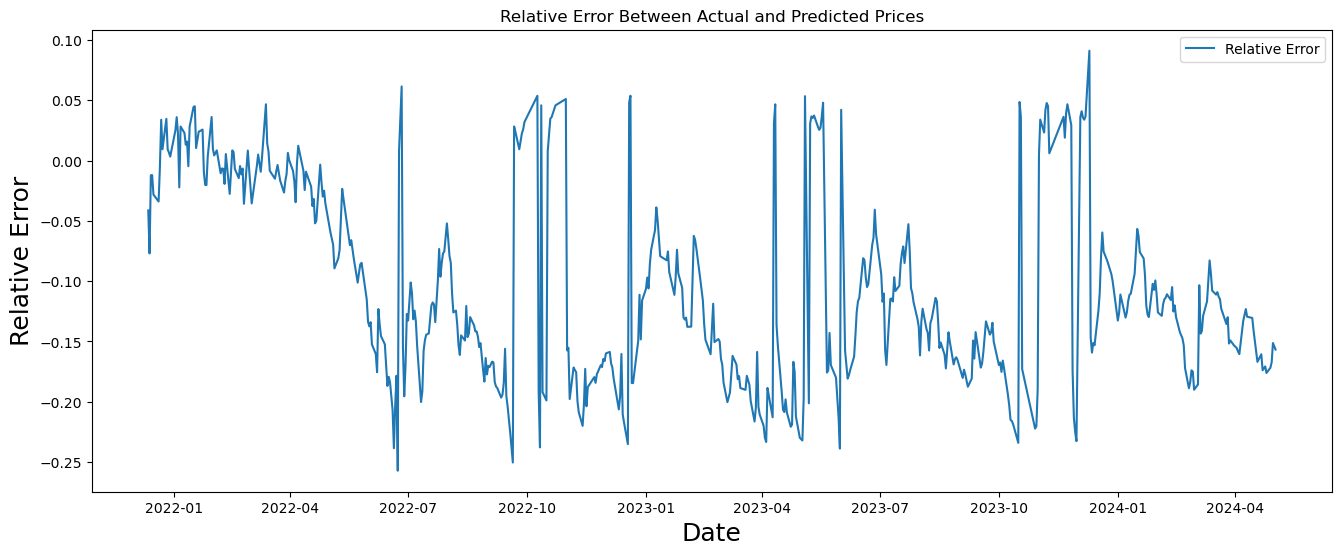

In [72]:
# Calculate relative error
valid['Relative_Error'] = (valid['Close'] - valid['Predictions']) / valid['Close']

# Sort DataFrame by date
valid = valid.sort_values(by='Date')

# Plotting
plt.figure(figsize=(16, 6))
plt.plot(valid['Date'], valid['Relative_Error'], label='Relative Error')
plt.title('Relative Error Between Actual and Predicted Prices')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Relative Error', fontsize=18)
plt.legend()

plot_no = 3
file_name = f'plot_{plot_no}.png'
plt.savefig(os.path.join(save_folder, file_name))

plt.show()

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# # Assuming you have the predictions for the test data
# predicted_ltp_values = model.predict(x_test)
# predicted_ltp_values = scaler.inverse_transform(predicted_ltp_values)  # Inverse transform to get original scale

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, rf_predicted_ltp_values))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test, rf_predicted_ltp_values)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MAPE
mape = np.mean(np.abs((y_test - rf_predicted_ltp_values) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


Root Mean Squared Error (RMSE): 261.5635221121983
Mean Absolute Error (MAE): 230.47810142348754
Mean Absolute Percentage Error (MAPE): 11.48482225400264%


In [190]:
# Save the output to a file
file_path = os.path.join(save_folder, 'evaluation_results.txt')
with open(file_path, 'w') as f:
    f.write(f'Root Mean Squared Error (RMSE): {rmse}\n')
    f.write(f'Mean Absolute Error (MAE): {mae}\n')
    f.write(f'Mean Absolute Percentage Error (MAPE): {mape}%\n')

# BPNN

In [52]:
from sklearn.neural_network import MLPRegressor

In [53]:
x_train

array([[[0.05406389, 0.05357812, 0.05271403, ..., 0.42033272,
         0.21124235, 0.31957386],
        [0.05765247, 0.05713446, 0.05621302, ..., 0.42119217,
         0.61340786, 0.46617643],
        [0.05901009, 0.05847987, 0.05753674, ..., 0.42269335,
         0.83979137, 0.53662621],
        ...,
        [0.05275946, 0.05228541, 0.05144217, ..., 0.47430138,
         0.59618614, 0.49525671],
        [0.05309816, 0.05262107, 0.05177242, ..., 0.47675412,
         0.61415787, 0.49116412],
        [0.05214643, 0.05167789, 0.05084445, ..., 0.47845944,
         0.56365879, 0.46334322]],

       [[0.05765247, 0.05713446, 0.05621302, ..., 0.42119217,
         0.61340786, 0.46617643],
        [0.05901009, 0.05847987, 0.05753674, ..., 0.42269335,
         0.83979137, 0.53662621],
        [0.06298216, 0.06241626, 0.06140964, ..., 0.42520443,
         0.98042468, 0.67941428],
        ...,
        [0.05309816, 0.05262107, 0.05177242, ..., 0.47675412,
         0.61415787, 0.49116412],
        [0.0

In [54]:
x_train.shape, y_train.shape

((2542, 60, 14), (2542,))

In [55]:
#  Flatten x_train
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_train.shape

(2542, 840)


- `(x_train.shape[0], x_train.shape[1]*x_train.shape[2])`: This tuple specifies the desired shape of the flattened array. 
- `x_train.shape[0]` represents the number of samples in the dataset.
- `x_train.shape[1]*x_train.shape[2]` calculates the total number of elements in each sample after flattening, which is achieved by multiplying the width and height dimensions of each image.


In [56]:
# Define the BPNN model
bpnn_model_nica_10 = MLPRegressor(hidden_layer_sizes=(128, 64), 
                           activation='relu', 
                           solver='adam', 
                           alpha=0.001, 
                           batch_size=10, 
                           max_iter=10, 
                           random_state=42)


In [57]:
# Train the BPNN model

bpnn_model_nica_10.fit(x_train, y_train)

C:\Users\M9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.001, batch_size=10, hidden_layer_sizes=(128, 64),
             max_iter=10, random_state=42)

In [ ]:
# import pickle
# import os

# # Define the folder and model name
#   # Using forward slashes

    
# switch_folder = 'nica/bpnn/10'
# model_name = 'bpnn_model_nica_10.pkl'

# # Define the full file path where you want to save the model using f-string
# file_path = f'D:/Financial_analysis/01_stock_results/techincalFeature/{switch_folder}/{model_name}'

# # Ensure the directory exists, create if it doesn't
# os.makedirs(os.path.dirname(file_path), exist_ok=True)

# # Save the trained model to disk
# with open(file_path, 'wb') as f:
#     pickle.dump('lstm_model_nica_10.pkl', f)


In [ ]:
# Prepare the testing data
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, 0]  # Assuming you want to predict the 'Ltp' feature

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, :])

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)
x_test.shape

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[2]))
x_test.shape

In [62]:
# Generate predictions on the test data
predictions = bpnn_model_nica_10.predict(x_test)


# Reshape predictions to match the original data shape
predictions = predictions.reshape(-1, 1)

# Repeat the column to match the original data shape
predictions = np.repeat(predictions, 14, axis=1)

# # Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)

In [63]:
predictions,predictions.shape

(array([[3411.88499737, 3440.17184755, 3491.77635441, ...,  154.67991886,
          -10.92426696,  347.27212382],
        [3436.02058144, 3464.52626008, 3516.52998195, ...,  157.18161029,
          -10.2351727 ,  352.52161766],
        [3475.21354347, 3504.0745703 , 3556.72656398, ...,  161.24402276,
           -9.11617574,  361.04609388],
        ...,
        [2556.35945501, 2576.88956965, 2614.34324282, ...,   66.00334414,
          -35.35034833,  161.19516598],
        [2540.05869729, 2560.44101895, 2597.62506919, ...,   64.31374484,
          -35.81575073,  157.64974827],
        [2509.16397692, 2529.26618751, 2565.93922314, ...,   61.11145824,
          -36.69782486,  150.93014109]]),
 (650, 14))

In [64]:
predicted_ltp_values = predictions[:, 0]
predicted_ltp_values.shape, predicted_ltp_values

((650,),
 array([3411.88499737, 3436.02058144, 3475.21354347, 3498.09464194,
        3553.00498768, 3581.7321824 , 3646.31794931, 3655.5862616 ,
        3671.11533991, 3674.9725345 , 3707.3250171 , 3715.86603547,
        3721.16211976, 3735.34371981, 3704.21027032, 3681.89389714,
        3702.43183066, 3640.74732094, 3612.42736299, 3612.43481008,
        3538.33284078, 3481.99701141, 3477.46694743, 3400.44060361,
        3437.52206415, 3500.46996437, 3542.96710744, 3552.88445184,
        3549.46516408, 3549.82824369, 3568.58848811, 3494.72094156,
        3457.05509197, 3513.34683671, 3481.82124501, 3445.33115471,
        3411.61734267, 3344.82125891, 3296.50350042, 3287.29659619,
        3275.36541837, 3201.55112039, 3160.55225302, 3167.10599399,
        3130.61300573, 3051.26880443, 3050.75129668, 3043.02046721,
        3006.75577024, 2995.9039815 , 2952.04073596, 2945.169808  ,
        2989.66898592, 3046.73011772, 3103.34888713, 3130.07288768,
        3178.29984829, 3263.14541259, 3

C:\Users\M9\AppData\Local\Temp\ipykernel_13848\2485929989.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.loc[:, 'Predictions'] = predicted_ltp_values


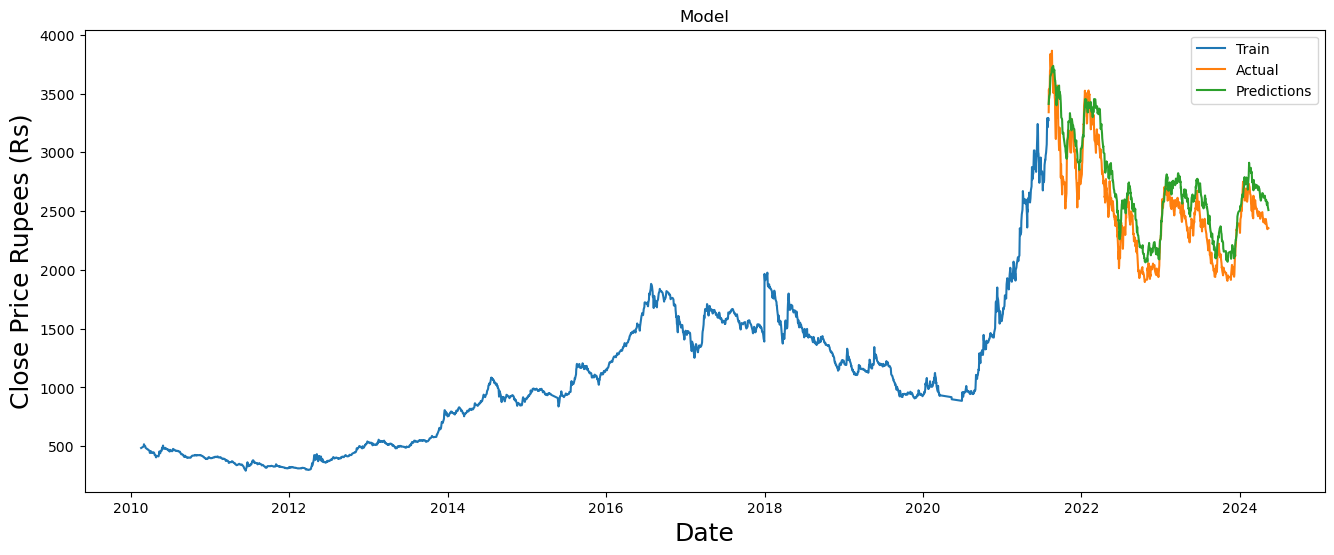

In [65]:
import matplotlib.pyplot as plt

train = new_data[:training_data_len]
valid = new_data[training_data_len:]
predicted_ltp_values = predicted_ltp_values[:len(valid)]

# Add the 'Predictions' column to the 'valid' DataFrame
valid.loc[:, 'Predictions'] = predicted_ltp_values

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupees (Rs)', fontsize=18)
plt.plot(train['Date'],train['Close'])  # Used 'Ltp' instead of 'Close'
plt.plot(valid['Date'],valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='upper right')

# plot_no = 1
# save_folder = f'D:/Financial_analysis/01_stock_results/techincalFeature/{switch_folder}'
# file_name = f'plot_{plot_no}.png'
# plt.savefig(os.path.join(save_folder, file_name))

# plt.savefig('D:/Financial_analysis/01_stock_results/NMB/bpnn/250/plot01.png')
plt.show()

C:\Users\M9\AppData\Local\Temp\ipykernel_13848\2221632872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Date'] = pd.to_datetime(valid['Date'])


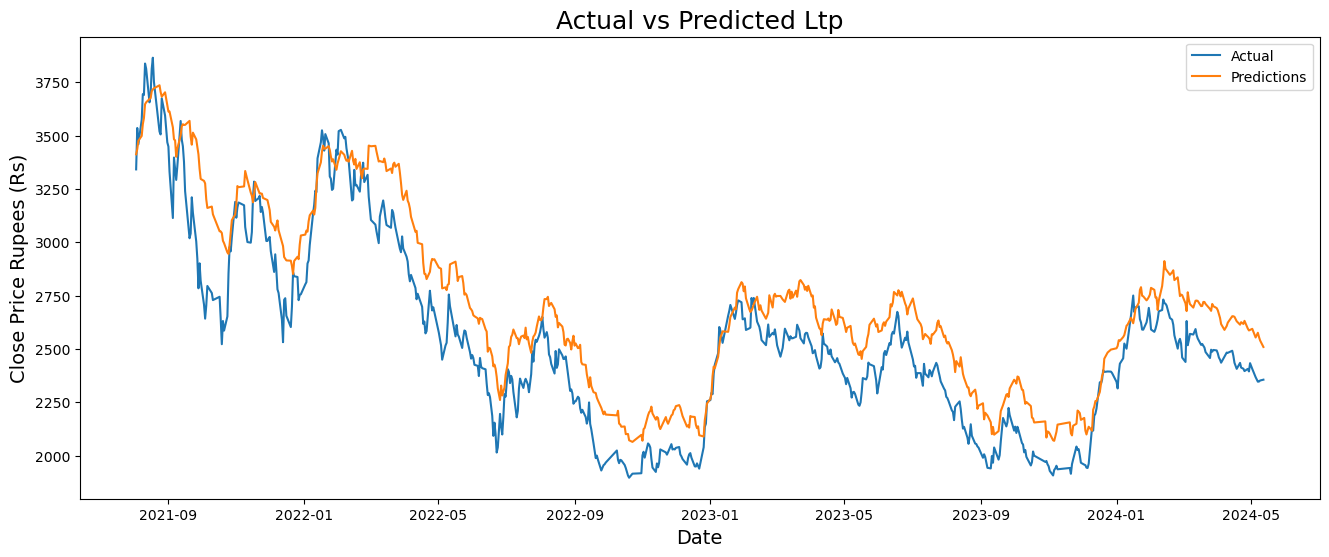

In [66]:
# Convert 'Date' column to datetime format (if not already)
valid['Date'] = pd.to_datetime(valid['Date'])

# Plotting
plt.figure(figsize=(16, 6))
plt.title('Actual vs Predicted Ltp', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price Rupees (Rs)', fontsize=14)

# Plot actual Ltp values
plt.plot(valid['Date'], valid['Close'], label='Actual')
         # , marker='o', linestyle='-')

# Plot predicted Ltp values
plt.plot(valid['Date'], valid['Predictions'], label='Predictions')
         # , marker='x', linestyle='--')

plt.legend()


# plot_no = 2
# file_name = f'plot_{plot_no}.png'
# plt.savefig(os.path.join(save_folder, file_name))
plt.show()

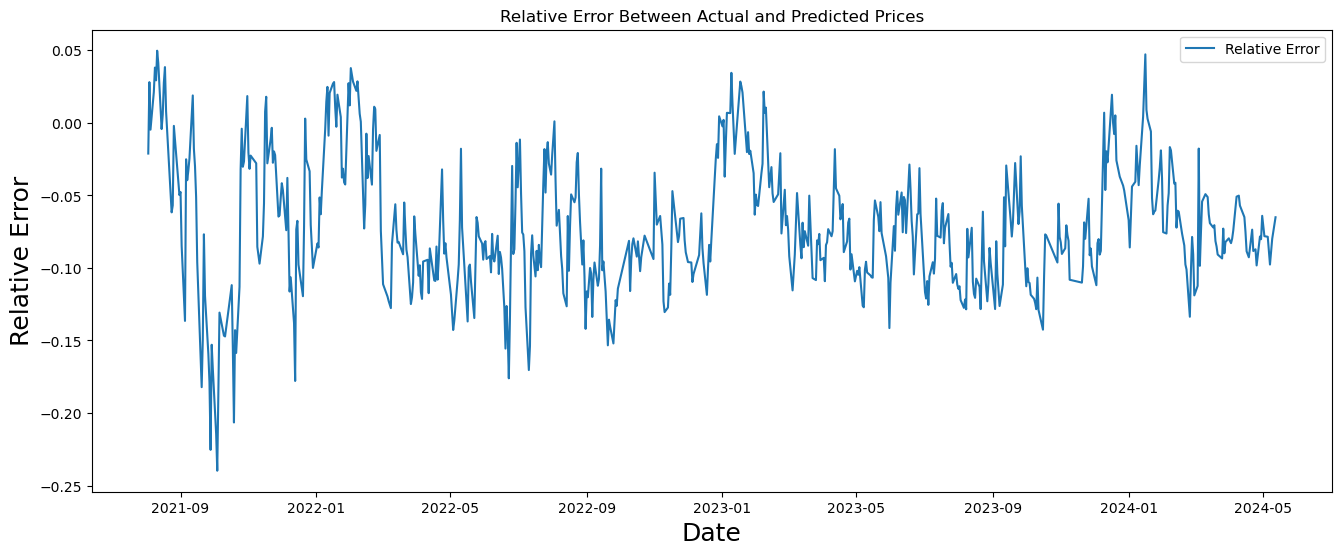

In [68]:
# Calculate relative error
valid['Relative_Error'] = (valid['Close'] - valid['Predictions']) / valid['Close']

# Sort DataFrame by date
valid = valid.sort_values(by='Date')

# Plotting
plt.figure(figsize=(16, 6))
plt.plot(valid['Date'], valid['Relative_Error'], label='Relative Error')
plt.title('Relative Error Between Actual and Predicted Prices')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Relative Error', fontsize=18)
plt.legend()

# plot_no = 3
# file_name = f'plot_{plot_no}.png'
# plt.savefig(os.path.join(save_folder, file_name))
plt.show()

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# # Assuming you have the predictions for the test data
# predicted_ltp_values = model.predict(x_test)
# predicted_ltp_values = scaler.inverse_transform(predicted_ltp_values)  # Inverse transform to get original scale

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicted_ltp_values))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test, predicted_ltp_values)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MAPE
mape = np.mean(np.abs((y_test - predicted_ltp_values) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Root Mean Squared Error (RMSE): 206.24260381767743
Mean Absolute Error (MAE): 181.9344693947679
Mean Absolute Percentage Error (MAPE): 7.438310284955108%


In [220]:
# Save the output to a file
file_path = os.path.join(save_folder, 'evaluation_results.txt')
with open(file_path, 'w') as f:
    f.write(f'Root Mean Squared Error (RMSE): {rmse}\n')
    f.write(f'Mean Absolute Error (MAE): {mae}\n')
    f.write(f'Mean Absolute Percentage Error (MAPE): {mape}%\n')

# GRU

In [70]:
from keras.models import Sequential
from keras.layers import GRU, Dense

# Define the GRU model
gru_model = Sequential()
gru_model.add(GRU(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1))) 
gru_model.add(GRU(units=64))
gru_model.add(Dense(1))


In [71]:
# Compile the model
gru_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = gru_model.fit(x_train, y_train, epochs=2, batch_size=10, verbose=2)


# Plot the loss graph
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.show()
plt.show() 

Epoch 1/2
255/255 - 348s - loss: 0.0108 - 348s/epoch - 1s/step
Epoch 2/2



KeyboardInterrupt



In [ ]:
import pickle
import os

# Define the folder and model name
  # Using forward slashes

    
switch_folder = 'nica/gru/10'
model_name = 'gru_model.pkl'

# Define the full file path where you want to save the model using f-string
file_path = f'D:/Financial_analysis/01_stock_results/techincalFeature2/{switch_folder}/{model_name}'

# Ensure the directory exists, create if it doesn't
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Save the trained model to disk
with open(file_path, 'wb') as f:
    pickle.dump('lstm_model_nica_10.pkl', f)

In [74]:
# Prepare the testing data
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, 0]  # Assuming you want to predict the 'Ltp' feature

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, :])

In [75]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [76]:
# Reshape the data
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 4))

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[2]))

In [77]:
# Generate predictions on the test data
predictions = gru_model.predict(x_test)


# Reshape predictions to match the original data shape
predictions = predictions.reshape(-1, 1)

# Repeat the column to match the original data shape
predictions = np.repeat(predictions, 14, axis=1) ### Edited here 



# # Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)

21/21 [==============================] - 10s 398ms/step


In [78]:
predictions

array([[3291.7056  , 3318.9028  , 3368.5195  , ...,  142.22313 ,
         -14.355504,  321.1331  ],
       [3322.913   , 3350.393   , 3400.5261  , ...,  145.45782 ,
         -13.464503,  327.92072 ],
       [3441.583   , 3470.1392  , 3522.2349  , ...,  157.75816 ,
         -10.076359,  353.73145 ],
       ...,
       [2250.1106  , 2267.864   , 2300.2522  , ...,   34.260162,
         -44.094048,   94.585976],
       [2270.146   , 2288.081   , 2320.8005  , ...,   36.336864,
         -43.52202 ,   98.94368 ],
       [2310.2412  , 2328.5398  , 2361.9226  , ...,   40.4928  ,
         -42.377262,  107.664406]], dtype=float32)

In [79]:
#Extract the Ltp predictions result from ['ltp', 'high', 'low', 'open'] 
predicted_ltp_values = predictions[:, 0]
predicted_ltp_values

array([3291.7056, 3322.913 , 3441.583 , 3507.9475, 3424.1597, 3519.4868,
       3618.8362, 3623.051 , 3640.7646, 3542.963 , 3509.4553, 3613.7214,
       3802.5598, 3746.6226, 3550.5964, 3399.7349, 3325.6555, 3579.2961,
       3458.642 , 3227.5686, 3122.7712, 2876.574 , 3070.4788, 3321.6497,
       3300.463 , 3202.13  , 3300.146 , 3433.1606, 3474.6143, 3330.193 ,
       3170.0212, 2983.9004, 2862.8164, 3041.6184, 3262.2354, 3230.654 ,
       2901.8196, 2752.48  , 2778.1992, 2803.837 , 2640.9856, 2535.2605,
       2564.9333, 2746.1436, 2905.5098, 2940.3274, 2832.0872, 2665.5583,
       2539.3704, 2572.707 , 2698.799 , 2796.5835, 2776.063 , 3111.4697,
       3240.6692, 3138.6658, 3215.8713, 3255.4463, 3193.4758, 3219.952 ,
       3250.7869, 3189.4412, 3123.049 , 3004.7263, 3111.7053, 3255.0955,
       3384.361 , 3378.1763, 3205.2998, 3184.258 , 3138.128 , 3115.1843,
       3071.7483, 3082.4485, 2893.4858, 2876.4583, 2967.9958, 2938.0813,
       2791.078 , 2739.2253, 2861.319 , 2852.5415, 

C:\Users\M9\AppData\Local\Temp\ipykernel_13848\2906254145.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.loc[:, 'Predictions'] = predicted_ltp_values


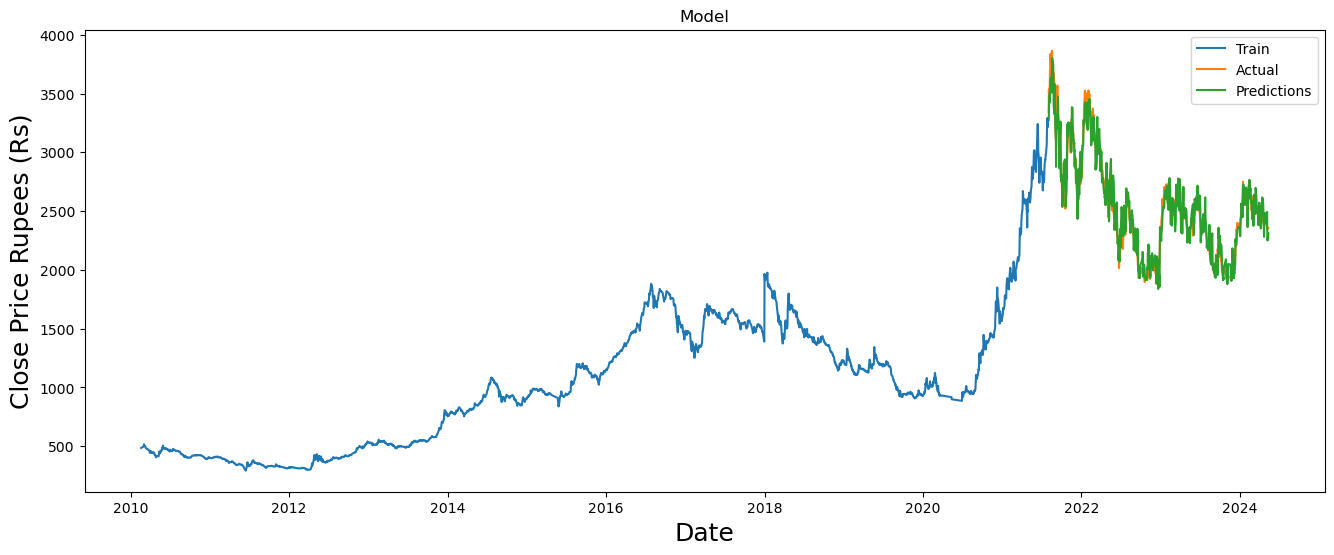

In [80]:
import matplotlib.pyplot as plt

# Assuming train and valid DataFrames are defined earlier

# # Get the dates for the train and validation data
# train_dates = train.index  # Assuming 'Date' is in the index
# valid_dates = valid.index  # Assuming 'Date' is in the index

# Plotting
train = new_data[:training_data_len]
valid = new_data[training_data_len:]
predicted_ltp_values = predicted_ltp_values[:len(valid)]

# Add the 'Predictions' column to the 'valid' DataFrame
valid.loc[:, 'Predictions'] = predicted_ltp_values

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupees (Rs)', fontsize=18)
plt.plot(train['Date'],train['Close'])  # Used 'Ltp' instead of 'Close'
plt.plot(valid['Date'],valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='upper right')
# locFolder = 'hydro/bpnn/250'
# plot_no = 1
# plt.savefig(f'D:/Financial_analysis/01_stock_results/{locFolder}/plot{plot_no}.png')
# plt.savefig('D:/Financial_analysis/01_stock_results/NMB/bpnn/250/plot01.png')
plt.show()

C:\Users\M9\AppData\Local\Temp\ipykernel_13848\435249261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Date'] = pd.to_datetime(valid['Date'])


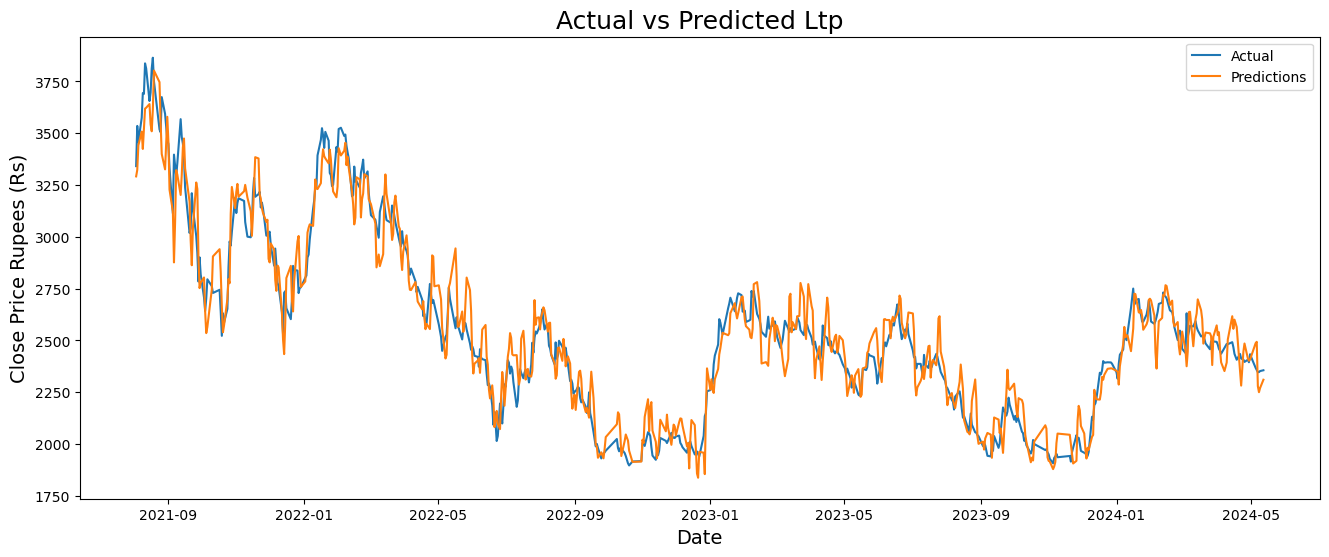

In [81]:
# Convert 'Date' column to datetime format (if not already)
valid['Date'] = pd.to_datetime(valid['Date'])

# Plotting
plt.figure(figsize=(16, 6))
plt.title('Actual vs Predicted Ltp', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price Rupees (Rs)', fontsize=14)

# Plot actual Ltp values
plt.plot(valid['Date'], valid['Close'], label='Actual')
         # , marker='o', linestyle='-')

# Plot predicted Ltp values
plt.plot(valid['Date'], valid['Predictions'], label='Predictions')
         # , marker='x', linestyle='--')

plt.legend()
# # locFolder = 'NMB/bpnn/10'
# plot_no = 2
# plt.savefig(f'D:/Financial_analysis/01_stock_results/{locFolder}/plot{plot_no}.png')
plt.show()

C:\Users\M9\AppData\Local\Temp\ipykernel_13848\3315009768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Relative_Error'] = (valid['Close'] - valid['Predictions']) / valid['Close']


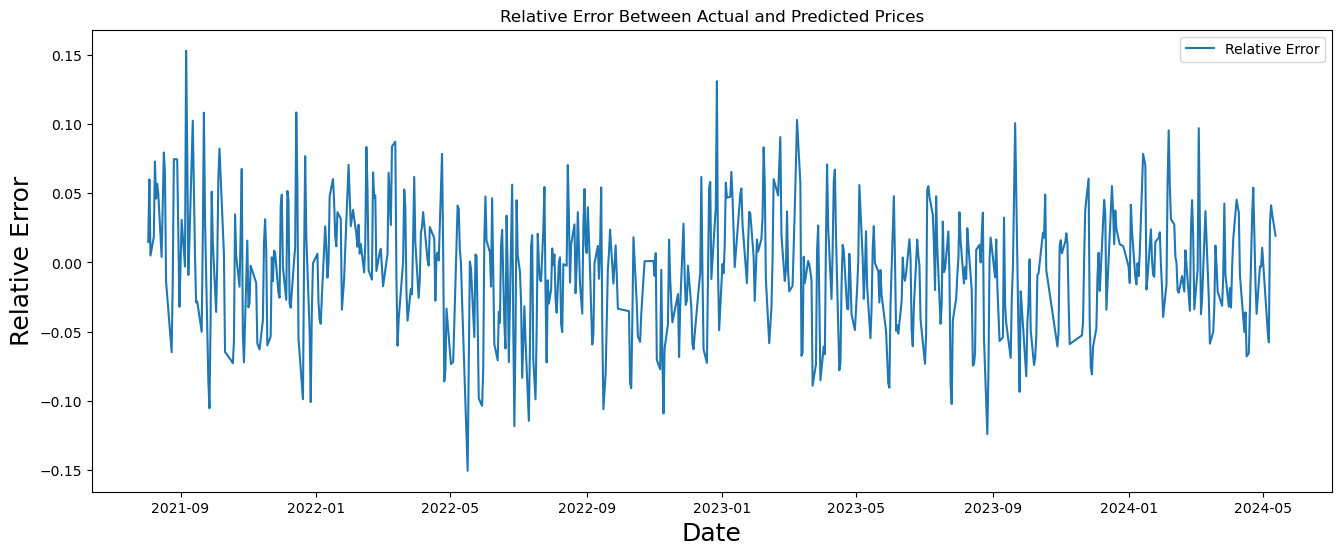

In [82]:
# Calculate relative error
valid['Relative_Error'] = (valid['Close'] - valid['Predictions']) / valid['Close']

# Sort DataFrame by date
valid = valid.sort_values(by='Date')

# Plotting
plt.figure(figsize=(16, 6))
plt.plot(valid['Date'], valid['Relative_Error'], label='Relative Error')
plt.title('Relative Error Between Actual and Predicted Prices')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Relative Error', fontsize=18)
plt.legend()
# plot_no = 3
# plt.savefig(f'D:/Financial_analysis/01_stock_results/{locFolder}/plot{plot_no}.png')
# plt.savefig('D:/Financial_analysis/01_stock_results/NICA/bpnn/10/plot03.png')
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# # Assuming you have the predictions for the test data
# predicted_ltp_values = model.predict(x_test)
# predicted_ltp_values = scaler.inverse_transform(predicted_ltp_values)  # Inverse transform to get original scale

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicted_ltp_values))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test, predicted_ltp_values)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MAPE
mape = np.mean(np.abs((y_test - predicted_ltp_values) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Root Mean Squared Error (RMSE): 113.69829146785735
Mean Absolute Error (MAE): 87.21551107271635
Mean Absolute Percentage Error (MAPE): 3.42808171775483%


In [ ]:
# Save the output to a file
file_path = os.path.join(save_folder, 'evaluation_results.txt')
with open(file_path, 'w') as f:
    f.write(f'Root Mean Squared Error (RMSE): {rmse}\n')
    f.write(f'Mean Absolute Error (MAE): {mae}\n')
    f.write(f'Mean Absolute Percentage Error (MAPE): {mape}%\n')